In [1]:
import readSim as rs 

import numpy as np
from numba import njit

import scipy.optimize as op

import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib widget

In [2]:
sims = rs.Sims('/home/lorenzo/phd/LQG/OpenUniverse_TimeVSm')

In [3]:
Ms = []
times = []

for sim in sims[:]:

    Ms.append(sim.mass)
    times.append(sim.find_timeout())

Ms = np.array(Ms)
times = np.array(times)

Fit
$$
\ln T = a \ln M + b 
$$

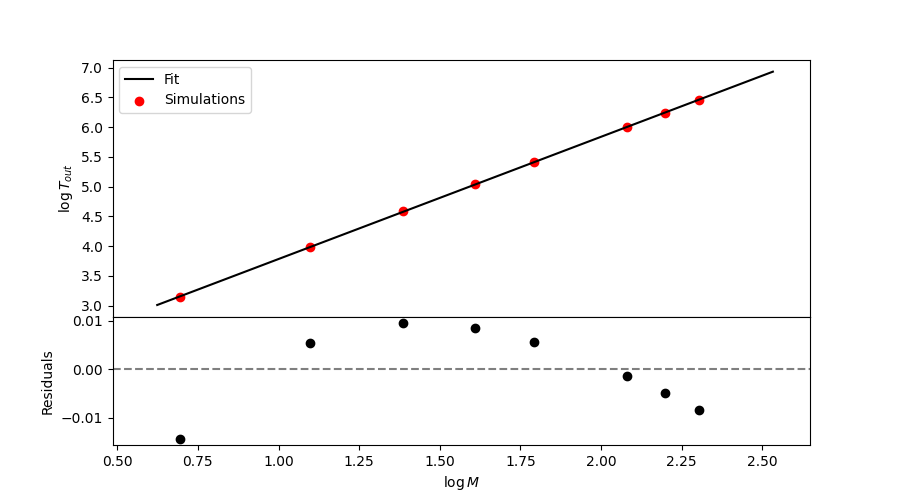

[2.05453642 1.73018209]


In [4]:
def residual_plot(x, y, func, popt, pcov):

    fig = plt.figure(figsize=(9,5))
    gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1]) 

    ax0 = plt.subplot(gs[0])

    xxx = np.linspace(0.9*np.min(x), 1.1*np.max(x), 1000)
    plt.plot(xxx, func(xxx, *popt), color = 'k', label = 'Fit')

    ax0.scatter(x, y, color = 'r', label='Simulations')

    ax0.set_ylabel(r'$\log T_{out}$')
    ax0.legend()

    ###############
    ### RESIDUALS
    ###############
    res = np.array(y) - func(np.array(x), *popt)

    ax1 = plt.subplot(gs[1], sharex = ax0)

    ax1.axhline(0, ls = '--', color = 'k', alpha = 0.5)
    # Residuals of fitted points
    plt.scatter(x, res, color = 'k')

    ax1.set_xlabel(r'$\log M$')
    ax1.set_ylabel('Residuals')

    ax0.set_xlim(0.7*np.min(x), 1.15*np.max(x))

    # remove vertical gap between subplots
    plt.setp(ax0.get_xticklabels(), visible=False)
    plt.subplots_adjust(hspace=.0)
    plt.show()

    # Errors in parameters
    pi_opt = np.round(popt[0],4)
    s_pcov = np.sqrt(np.diagonal(pcov))
    text = f"Best fit parameters: " + fr"$a \approx {pi_opt} \pm {round_measurement(pi_opt, s_pcov[0])}$" 
    ax0.set_title(text)

    # ax0.set_yscale('log')
    # ax1.set_xscale('log')
    # ax1.set_yscale('log')

    return res

def round_measurement(value, uncertainty):
    # Count the number of significant digits in the measurement
    num_significant_digits = len(str(value).replace('.', '').lstrip('0'))

    # Round the uncertainty to the same number of significant digits
    rounded_uncertainty = round(uncertainty, num_significant_digits - 1)
    return rounded_uncertainty

def func(x, a, b):    
    return a*x + b

popt, pcov = op.curve_fit(func, np.log(Ms), np.log(times)) # , bounds=(0, np.inf)
residuals = residual_plot(np.log(Ms), np.log(times), func, popt, pcov)

print(popt)


Fit using the function
$$
T = a\left[b + \ln( 1 + \frac{c x_b}{M})\right] M^2  + d x_b M + e x_b^2 + f
$$
knowing that the analytical expression for the post bounce time is
$$
T = -\frac{8\pi}{\epsilon_0^3}\left[-\ln(1+\epsilon_0) - \frac{1}{2} \epsilon_0(\epsilon_0-2) + \log( 1 + \frac{\epsilon_0 x_b}{M})\right] M^2  + \frac{4\pi}{\epsilon_0^2} x_b M - \frac{\pi}{\epsilon_0} x_b^2
$$

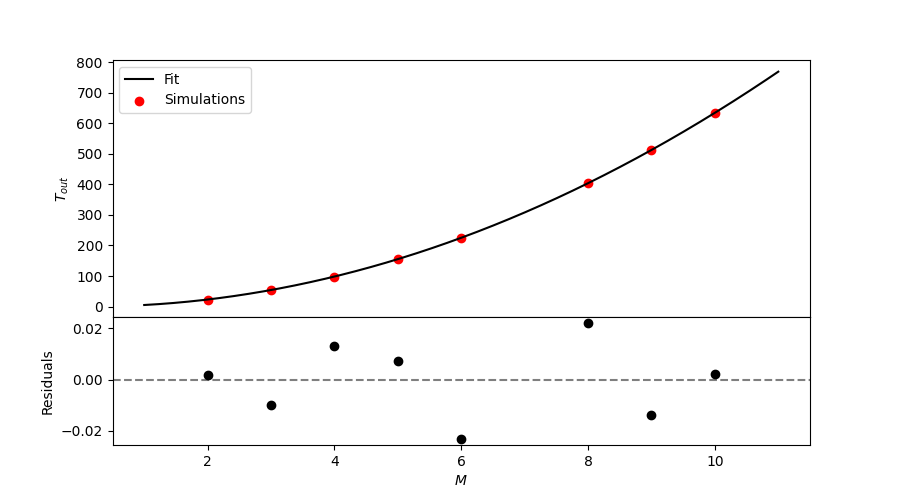

Expected parameters:
 - a = -392.69908169872406
 - b = -0.016472236621212832
 - c = 0.4
 - d = 78.53981633974482
 - e = -7.853981633974483

Initial parameters:
 - a = -100.5509818786008
 - b = -0.06447566928721579
 - c = 0.28741109771205225
 - d = 28.574481673884993
 - e = -4.828777718811535

Fitted parameters:
 - a = -177.8379220798792
 - b = -0.03667195433108973
 - c = 0.5501693600501969
 - d = 97.1214983082482
 - e = -26.068538790666214



In [10]:
def residual_plot(x, y, func, popt, pcov=None):

    fig = plt.figure(figsize=(9,5))
    gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1]) 

    ax0 = plt.subplot(gs[0])

    xxx = np.linspace(0.5*np.min(x), 1.1*np.max(x), 1000)
    plt.plot(xxx, func(xxx, *popt), color = 'k', label = 'Fit')

    ax0.scatter(x, y, color = 'r', label='Simulations')

    ax0.set_ylabel(r'$T_{out}$')
    ax0.legend()

    ###############
    ### RESIDUALS
    ###############
    res = np.array(y) - func(np.array(x), *popt)

    ax1 = plt.subplot(gs[1], sharex = ax0)

    ax1.axhline(0, ls = '--', color = 'k', alpha = 0.5)
    # Residuals of fitted points
    plt.scatter(x, res, color = 'k')

    ax1.set_xlabel(r'$M$')
    ax1.set_ylabel('Residuals')

    # remove vertical gap between subplots
    plt.setp(ax0.get_xticklabels(), visible=False)
    plt.subplots_adjust(hspace=.0)
    plt.show()

    # Errors in parameters
    # pi_opt = np.round(popt[0],2)
    # s_pcov = np.sqrt(np.diagonal(pcov))
    # text = f"Best fit parameters: " + fr"$a \approx {pi_opt} \pm {round_measurement(pi_opt, s_pcov[0])}$" 
    # ax0.set_title(text)

    # ax0.set_yscale('log')
    # ax1.set_xscale('log')
    # ax1.set_yscale('log')

    return res

def round_measurement(value, uncertainty):
    # Count the number of significant digits in the measurement
    num_significant_digits = len(str(value).replace('.', '').lstrip('0'))

    # Round the uncertainty to the same number of significant digits
    rounded_uncertainty = round(uncertainty, num_significant_digits - 1)
    return rounded_uncertainty

def fxb(x, alpha, rs):
    return x**3 + alpha * x - rs 

def func2(x, a, b, c, d, e, f):
    
    x = np.array(x)
    rs = 2 * x
    eps0 = 0.4

    xbs = np.zeros_like(rs)
    for i, r in enumerate(rs):
        xbs[i] = op.brentq(fxb, 1e-6, 5, args = (-eps0, r))
    return a*(b + np.log1p(c * xbs / x))*x**2  + d*xbs*x + e*xbs**2 + f

# Define the objective function for curve fitting
def objective_function(params, Ms, times):
    a, b, c, d, e, f = params
    y_pred = func2(Ms, a, b, c, d, e, f)
    residuals = (times - y_pred)
    return np.sum(residuals**2)

bounds = [(-1000, -10), (-10, 0), (0, 1), (0, 100), (-100, 0), (-100, 100)]  # Parameter bounds
result = op.differential_evolution(objective_function, bounds, args=(Ms, times), strategy='best1bin', polish=True)
initial_params = result.x

bounds = ([lb for lb,_ in bounds], [ub for _,ub in bounds])
popt2, pcov2 = op.curve_fit(func2, Ms, times, maxfev=10000000, p0=initial_params, bounds=bounds)
residuals2 = residual_plot(Ms, times, func2, popt2, pcov2)

eps0=0.4
print(f"Expected parameters:\n - a = {-8*np.pi/eps0**3}\n - b = {-np.log1p(eps0) - 0.5*eps0*(eps0-2)}\n - c = {eps0}\n - d = {4*np.pi/eps0**2}\n - e = {-np.pi / eps0}\n")

print(f"Initial parameters:\n - a = {initial_params[0]}\n - b = {initial_params[1]}\n - c = {initial_params[2]}\n - d = {initial_params[3]}\n - e = {initial_params[4]}\n")

print(f"Fitted parameters:\n - a = {popt2[0]}\n - b = {popt2[1]}\n - c = {popt2[2]}\n - d = {popt2[3]}\n - e = {popt2[4]}\n")


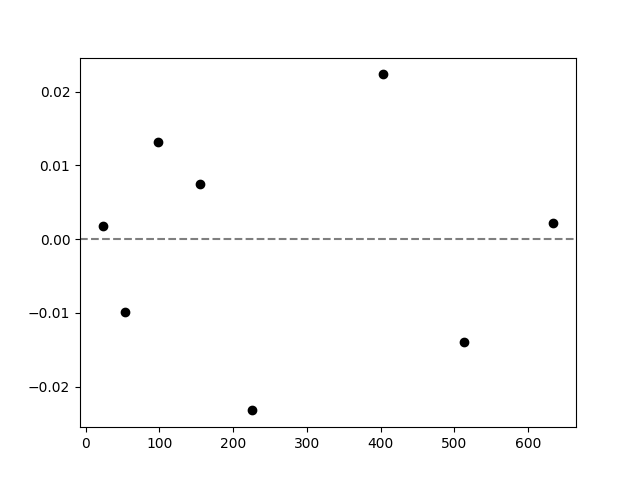

In [6]:
prediction = func2(np.array(Ms), *popt2)

fig = plt.figure()
plt.scatter(prediction, residuals2, color = 'k')

plt.axhline(0, ls='--', color='k', alpha = 0.5)

-5.341375786116487e-08


Text(0.5, 1.0, 'Mean = -0.0; $\\sigma$ = 0.014')

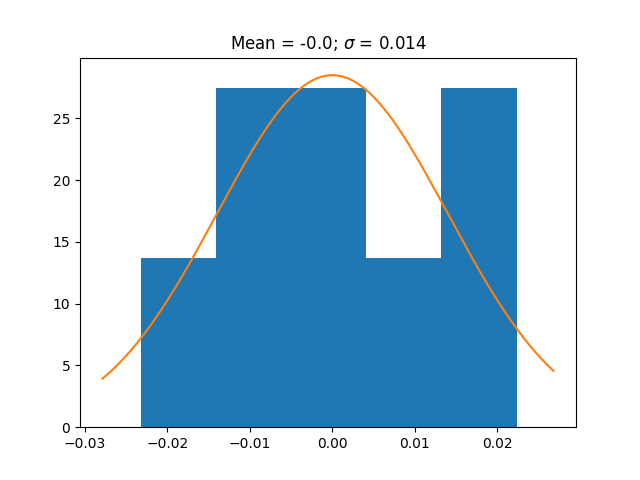

In [7]:
from scipy.stats import norm

fig = plt.figure()
_, bins, _ = plt.hist(residuals2, 5, density=True)

(mu, sigma) = norm.fit(residuals2)

x = np.linspace(1.2*np.min(bins), np.max(bins)*1.2, 1000)
best_fit_line = norm.pdf(x, mu, sigma)
plt.plot(x, best_fit_line)

print(mu)
plt.title(fr'Mean = {np.round(mu,3)}; $\sigma$ = {np.round(sigma,3)}')